In [1]:
from sentence_transformers import SentenceTransformer
import data.files as files
import topic.document_topics as topics

/Users/klara/Developer/Uni/WiSe2425/text_topic/topic_venv/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/Users/klara/Developer/Uni/WiSe2425/text_topic/topic_venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/msmarco-MiniLM-L-12-v3')

In [3]:
embeddings = model.encode(sentences)
#print(embeddings)

In [4]:
path = "/Users/klara/Downloads"
pdfs = files.get_files(path=path, file_ending="pdf")

In [5]:
embeddings = []
sentences = []
for pdf in pdfs:
    #print(files.extract_text_from_pdf(pdf))
    sentences.extend(files.extract_text_from_pdf(pdf))
    embeddings.append(model.encode(sentences[-1]))
    
#print(embeddings)

Ignoring wrong pointing object 8 0 (offset 0)
Ignoring wrong pointing object 10 0 (offset 0)
Ignoring wrong pointing object 12 0 (offset 0)
Ignoring wrong pointing object 32 0 (offset 0)
Ignoring wrong pointing object 34 0 (offset 0)
Ignoring wrong pointing object 38 0 (offset 0)
Ignoring wrong pointing object 54 0 (offset 0)
Ignoring wrong pointing object 59 0 (offset 0)
Ignoring wrong pointing object 60 0 (offset 0)
Ignoring wrong pointing object 243 0 (offset 0)


In [6]:
from top2vec import Top2Vec
#print(sentences.flatten())
#model = Top2Vec(sentences, embedding_model='universal-sentence-encoder')

In [7]:
model = topics.init_document_topics(corpus=sentences)

2024-10-21 18:16:07,332 - top2vec - INFO - Pre-processing documents for training
/Users/klara/Developer/Uni/WiSe2425/text_topic/topic_venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2024-10-21 18:16:07,383 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2024-10-21 18:16:09,617 - top2vec - INFO - Creating joint document/word embedding
2024-10-21 18:16:10,184 - top2vec - INFO - Creating lower dimension embedding of documents
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2024-10-21 18:16:13,107 - top2vec - INFO - Finding dense areas of documents
2024-10-21 18:16:13,110 - top2vec - INFO - Finding topics


In [8]:
model.get_num_topics()

2

In [9]:
model.get_topics()

(array([['globus', 'grid', 'toolkit', 'middleware', 'onnen', 'gz',
         'benutzer', 'ist', 'gd', 'unicore', 'auf', 'eine', 'oder', 'es',
         'dw', 'einer', 'kann', 'ein', 'auch', 'die', 'zk', 'mzkl',
         'wurde', 'dkz', 'ld', 'sgd', 'vd', 'im', 'mit', 'lz', 'sind',
         'den', 'sie', 'kd', 'ud', 'wird', 'dem', 'ldm', 'kz', 'sich',
         'der', 'mzk', 'rz', 'zm', 'an', 'dk', 'mz', 'das', 'rd', 'zu'],
        ['dm', 'dw', 'md', 'ldm', 'kz', 'rd', 'rz', 'sgd', 'kd', 'zk',
         'dz', 'gd', 'ld', 'dk', 'lz', 'dkz', 'mr', 'mzk', 'gz', 'mz',
         'vd', 'mzkl', 'zm', 'mit', 'an', 'des', 'ur', 'das', 'und', 'im',
         'ein', 'der', 'eine', 'zu', 'einer', 'ist', 'dr', 'es', 'den',
         'die', 'dem', 'wird', 'sich', 'von', 'and', 'in', 'oder', 'sie',
         'ud', 'sind']], dtype='<U10'),
 array([[ 0.10007982,  0.07184058,  0.04746882,  0.04555111,  0.00902327,
         -0.00190913, -0.00531514, -0.016539  , -0.01691297, -0.02072001,
         -0.02305615, -0.

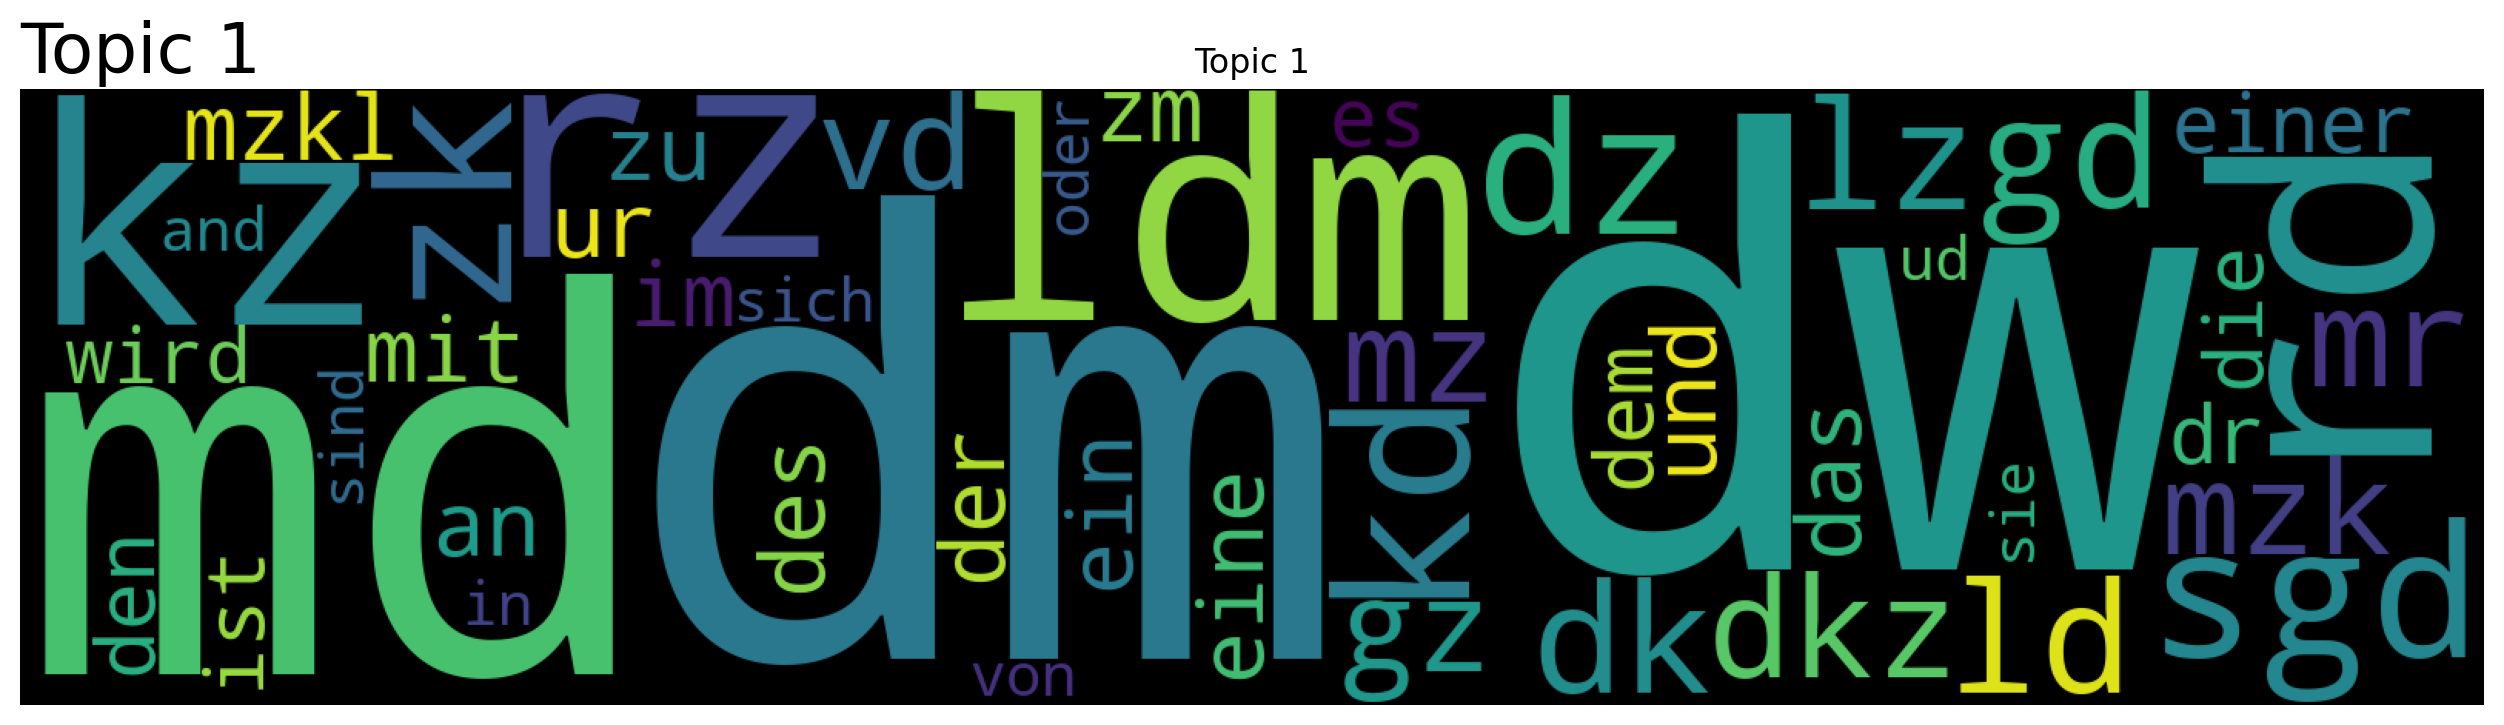

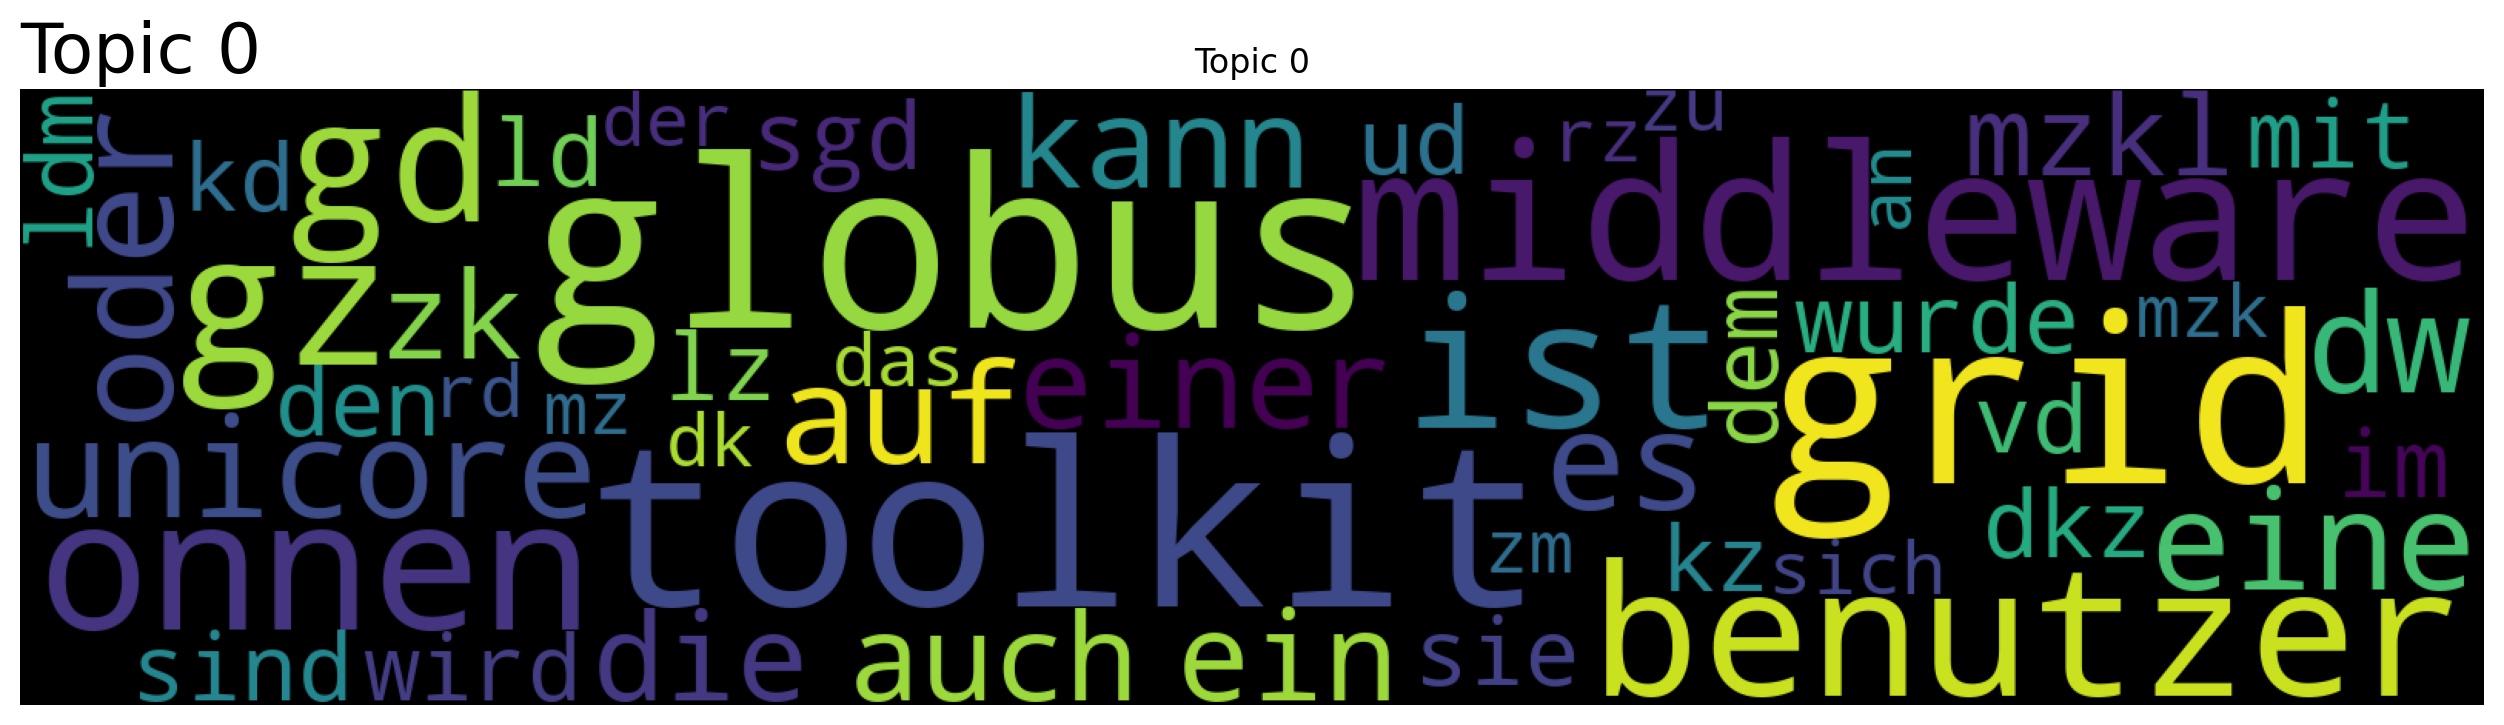

In [10]:
topics.display_wordcloud(model, keyword="benutzer")

In [11]:
topic_sizes, topic_nums = model.get_topic_sizes()
print(topic_sizes, topic_nums)

[67 51] [0 1]
